In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [295]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Изучим датасет train

In [296]:
train.shape

(8693, 14)

In [297]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [298]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [299]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [300]:
train.describe(include = ['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [301]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [302]:
transported = train[train['Transported'] == 1]
not_transported = train[train['Transported'] == 0]
print(f'Transported: {len(transported)}, {len(transported) / len(train) * 100}%')
print(f'Not transported: {len(not_transported)}, {len(not_transported) / len(train) * 100}%')

Transported: 4378, 50.362360519958585%
Not transported: 4315, 49.637639480041415%


## Заменим все значения колонок на тип int
Также добавим новую колонку CabinSide

In [305]:
train['Transported'] = train['Transported'].astype(int)
train['CryoSleep'] = train['CryoSleep'].apply(lambda x: 1 if x == True else 0)
train['VIP'] = train['VIP'].apply(lambda x: 1 if x == True else 0)
train['Cabin'] = train['Cabin'].astype(str)
train['CabinSide'] = train['Cabin'].apply(lambda x: 'S' if x == 'nan' else x.split('/')[-1])

In [306]:
test['CryoSleep'] = test['CryoSleep'].apply(lambda x: 1 if x == True else 0)
test['VIP'] = test['VIP'].apply(lambda x: 1 if x == True else 0)
test['Cabin'] = test['Cabin'].astype(str)
test['CabinSide'] = test['Cabin'].apply(lambda x: 'S' if x == 'nan' else x.split('/')[-1])

<AxesSubplot: xlabel='CabinSide', ylabel='count'>

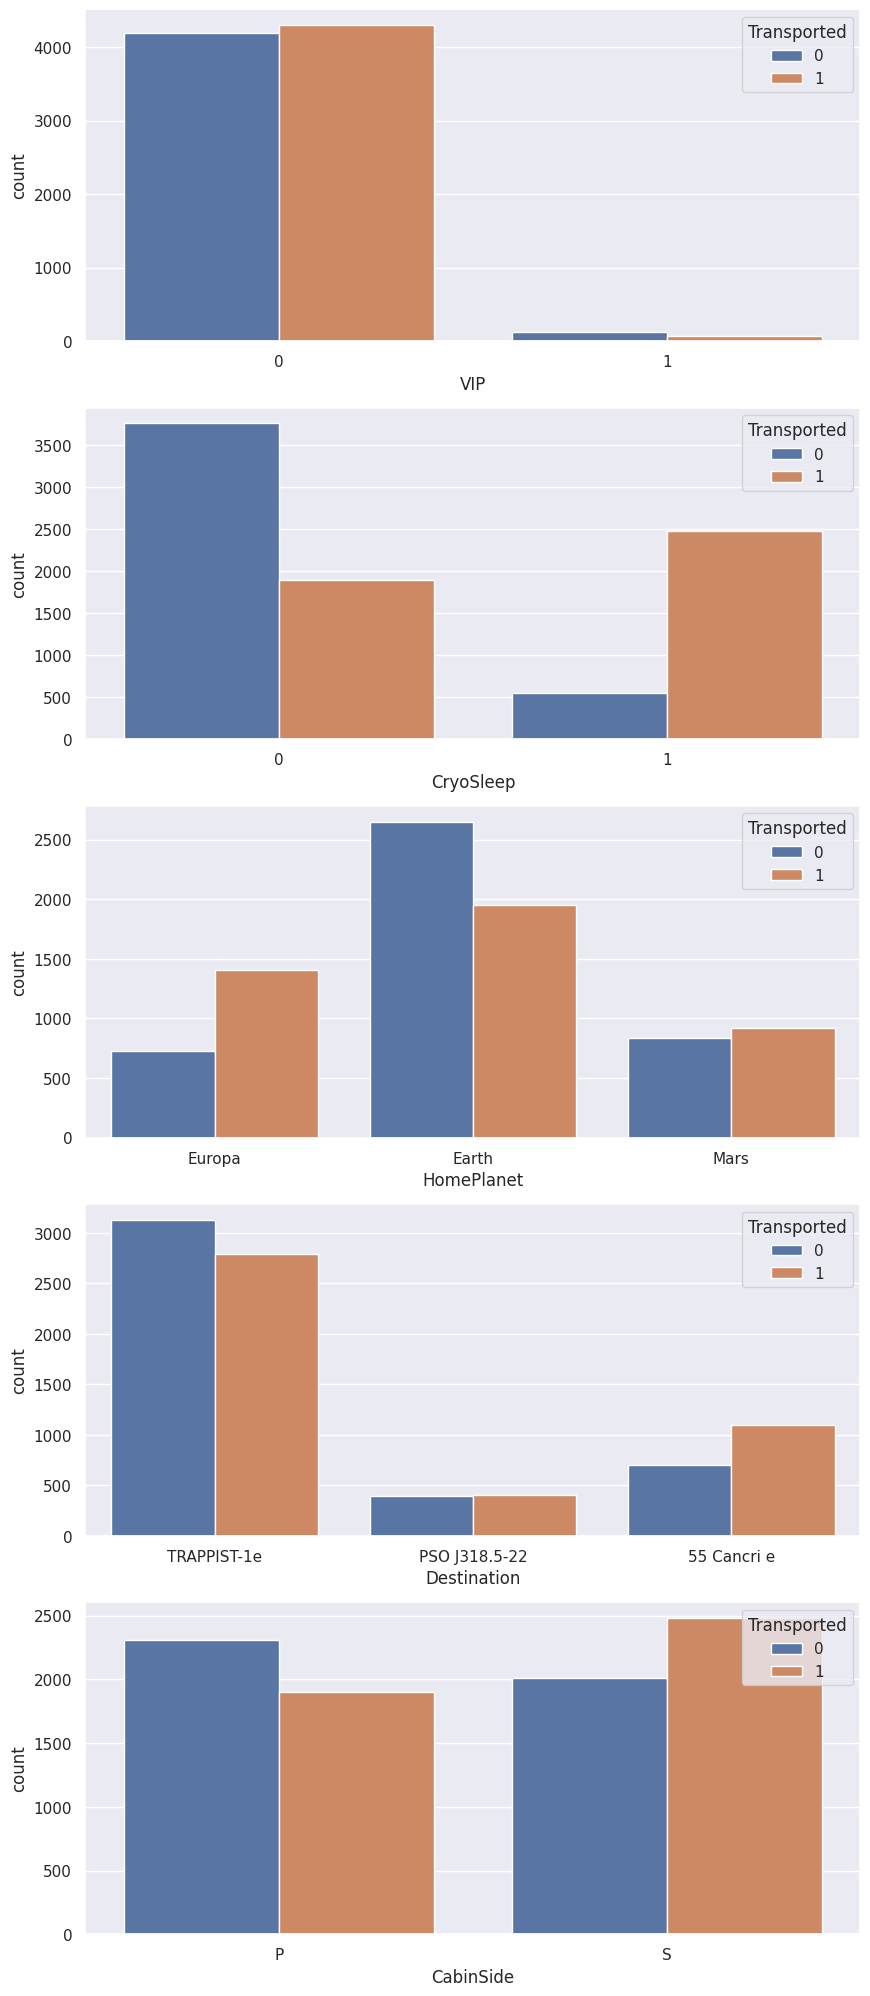

In [307]:
fig, axes = plt.subplots(5, 1, figsize = (10, 25))
sns.countplot(x = 'VIP', hue = 'Transported', data = train, ax = axes[0])
sns.countplot(x = 'CryoSleep', hue = 'Transported', data = train, ax = axes[1])
sns.countplot(x = 'HomePlanet', hue = 'Transported', data = train, ax = axes[2])
sns.countplot(x = 'Destination', hue = 'Transported', data = train, ax = axes[3])
sns.countplot(x = 'CabinSide', hue = 'Transported', data = train, ax = axes[4])

### Судя по графику, признак VIP рассматривать не  имеет смысла

Рассмотрим возможную связь между признаками CryoSleep и HomePlanet/Destination

CryoSleep         0     1
Destination              
55 Cancri e    1061   739
PSO J318.5-22   413   383
TRAPPIST-1e    4048  1867


Text(0, 0.5, 'Percentage')

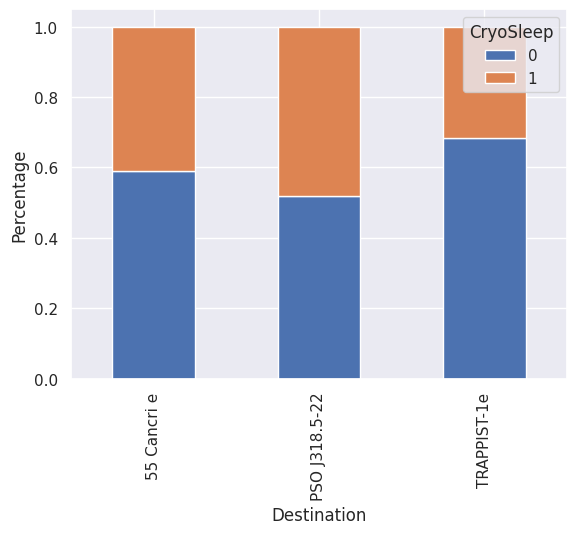

In [308]:
tab = pd.crosstab(train['Destination'], train['CryoSleep'])
print(tab)
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Destination')
plt.ylabel('Percentage')

CryoSleep      0     1
HomePlanet            
Earth       3220  1382
Europa      1220   911
Mars        1090   669


Text(0, 0.5, 'Percentage')

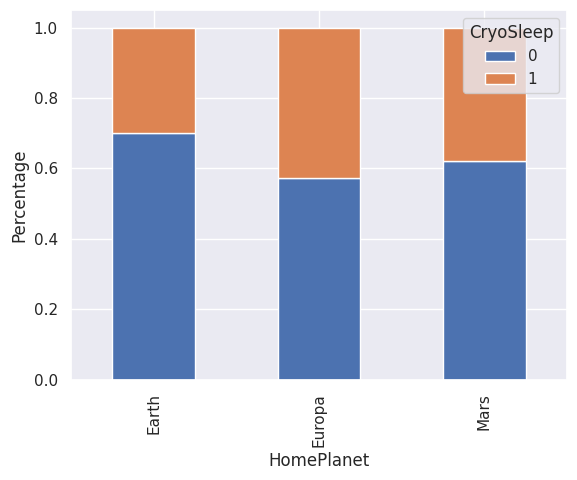

In [309]:
tab = pd.crosstab(train['HomePlanet'], train['CryoSleep'])
print(tab)
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('HomePlanet')
plt.ylabel('Percentage')

Теперь между признаками HomePlanet/Destination

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth                690            712         3101
Europa               886             19         1189
Mars                 193             49         1475


Text(0, 0.5, 'Percentage')

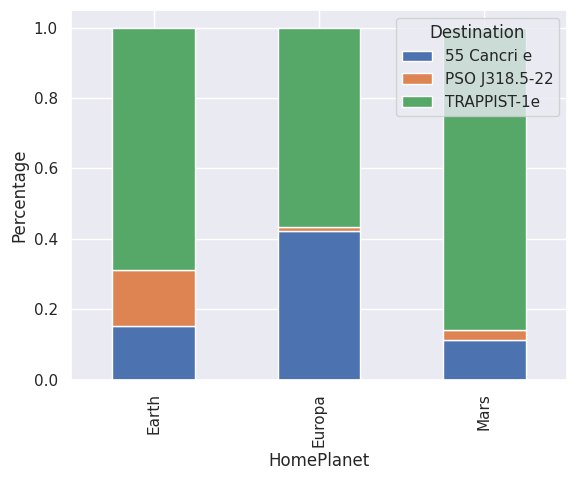

In [310]:
tab = pd.crosstab(train['HomePlanet'], train['Destination'])
print(tab)
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('HomePlanet')
plt.ylabel('Percentage')

### Составим признак, сколько всего человек потратил денег на корабле

In [311]:
train['FoodCourt'].fillna(0,inplace=True)
train['RoomService'].fillna(0, inplace=True)
train['ShoppingMall'].fillna(0, inplace=True)
train['Spa'].fillna(0, inplace=True)
train['VRDeck'].fillna(0, inplace=True)
train['TotalSpent'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [312]:
test['FoodCourt'].fillna(0,inplace=True)
test['RoomService'].fillna(0, inplace=True)
test['ShoppingMall'].fillna(0, inplace=True)
test['Spa'].fillna(0, inplace=True)
test['VRDeck'].fillna(0, inplace=True)
test['TotalSpent'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

### Рассмотрим связь его с другими признаками

<AxesSubplot: xlabel='CabinSide', ylabel='TotalSpent'>

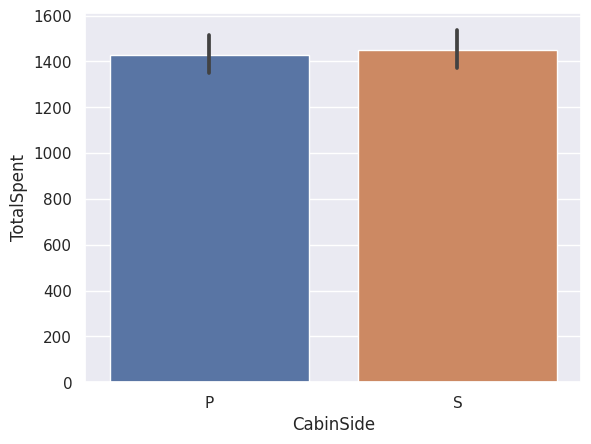

In [313]:
sns.barplot(x = 'CabinSide', y = 'TotalSpent', data = train)

<AxesSubplot: xlabel='HomePlanet', ylabel='TotalSpent'>

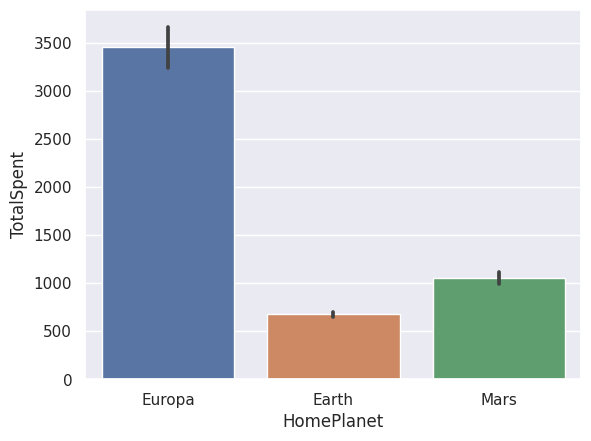

In [314]:
sns.barplot(x = 'HomePlanet', y = 'TotalSpent', data = train)

<AxesSubplot: xlabel='Transported', ylabel='TotalSpent'>

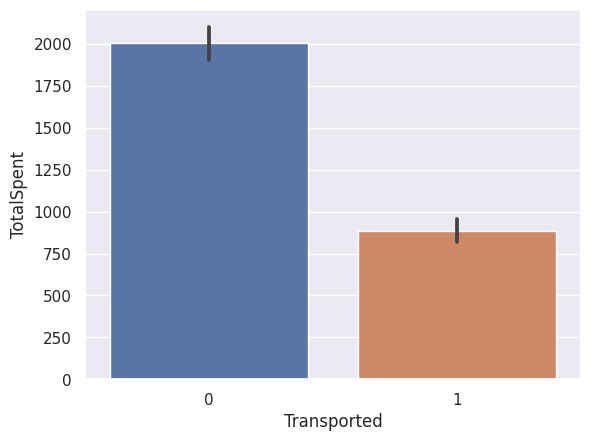

In [315]:
sns.barplot(x = 'Transported', y = 'TotalSpent', data = train)

<AxesSubplot: >

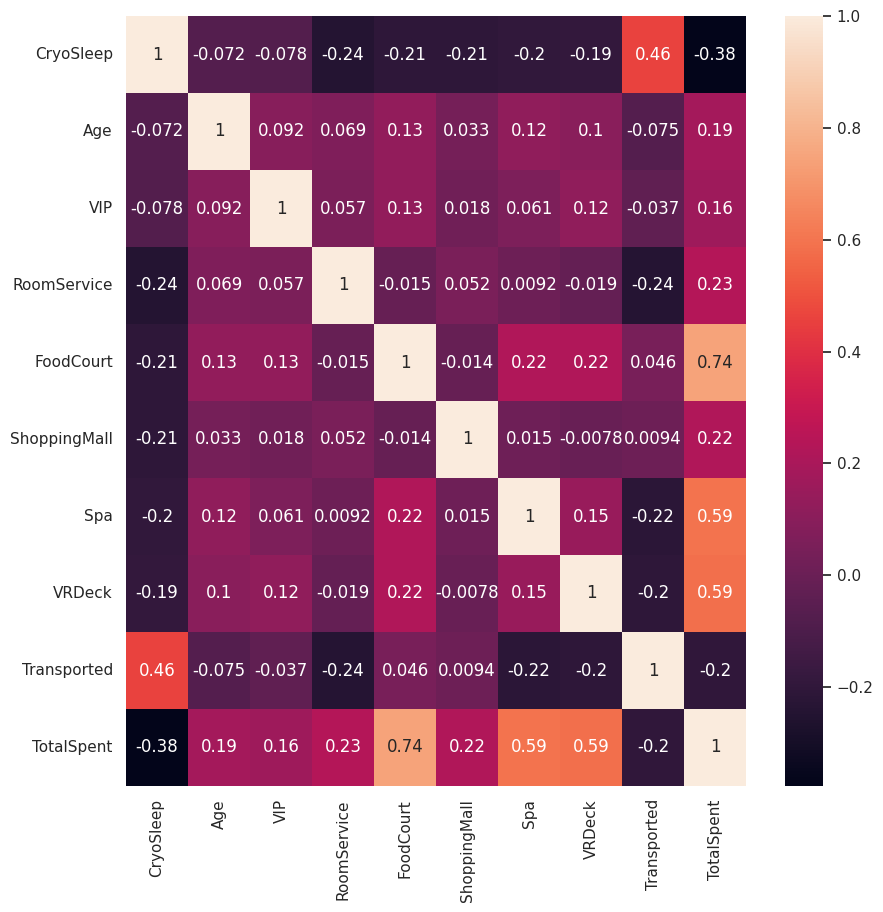

In [316]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train.corr(numeric_only = True), annot = True, ax = ax)

### Разделим признаки CabinSide, HomePlanet и Destination на номерные группы

In [317]:
cabinSideDict = {'P': 0, 'S': 1}
train['CabinSide'] = train['CabinSide'].apply(lambda x: cabinSideDict.get(x))

In [318]:
cabinSideDict = {'P': 0, 'S': 1}
test['CabinSide'] = test['CabinSide'].apply(lambda x: cabinSideDict.get(x))

In [319]:
train['HomePlanet'] = train['HomePlanet'].apply(lambda x: x if x !='nan' else 'Earth')
train['HomePlanet'] = train['HomePlanet'].astype(str)
planets = train['HomePlanet'].unique()
planetDict = {planets[0]: 0, planets[1]: 1, planets[2]: 2}
train['HomePlanet'] = train['HomePlanet'].apply(lambda x: planetDict.get(x))

In [320]:
test['HomePlanet'] = test['HomePlanet'].apply(lambda x: x if x !='nan' else 'Earth')
test['HomePlanet'] = test['HomePlanet'].astype(str)
planets = test['HomePlanet'].unique()
planetDict = {planets[0]: 0, planets[1]: 1, planets[2]: 2}
test['HomePlanet'] = test['HomePlanet'].apply(lambda x: planetDict.get(x))

In [321]:
train['Destination'] = train['Destination'].apply(lambda x: x if x !='nan' else 'TRAPPIST-1e')
train['Destination'] = train['Destination'].astype(str)
dest = train['Destination'].unique()
destDict = {dest[0]: 0, dest[1]: 1, dest[2]: 2}
train['Destination'] = train['Destination'].apply(lambda x: destDict.get(x))

In [322]:
test['Destination'] = test['Destination'].apply(lambda x: x if x !='nan' else 'TRAPPIST-1e')
test['Destination'] = test['Destination'].astype(str)
dest = test['Destination'].unique()
destDict = {dest[0]: 0, dest[1]: 1, dest[2]: 2}
test['Destination'] = test['Destination'].apply(lambda x: destDict.get(x))

Теперь разделим возраст на группы

In [323]:
train['Child']=train['Age'].apply(lambda x: 1 if x<12 else 0)
train['Youth']=train['Age'].apply(lambda x: 1 if x in range(12,21) else 0)
train['Middle_age']=train['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
train['Old']=train['Age'].apply(lambda x: 1 if x>=60 else 0)

In [324]:
test['Child']=test['Age'].apply(lambda x: 1 if x<12 else 0)
test['Youth']=test['Age'].apply(lambda x: 1 if x in range(12,21) else 0)
test['Middle_age']=test['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
test['Old']=test['Age'].apply(lambda x: 1 if x>=60 else 0)

<AxesSubplot: xlabel='variable', ylabel='count'>

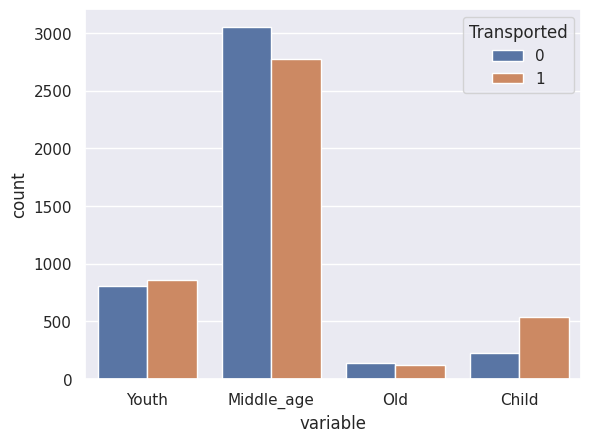

In [326]:
trainAge=train[['Transported','Youth','Middle_age','Old','Child']]
trainAge=pd.melt(trainAge, id_vars=['Transported'], value_vars=['Youth','Middle_age','Old', 'Child'])
trainAge=trainAge[trainAge['value']==1]
sns.countplot(data=trainAge, x='variable', hue='Transported')